Trevor & Jake Testing the ffn function(Using Yahoo finance source version)



In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader
!pip install ffn

     |████████████████████████████████| 11.5 MB 184 kB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.1 which is incompatible.


     |████████████████████████████████| 109 kB 5.1 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0
     |████████████████████████████████| 6.3 MB 8.0 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23919 sha256=280c305c607545a06ae4f2a1a0b6c0bdc2aa2cb6abc1ca0bee8edbe96528531e
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import ffn
 
data = ffn.get('tsla,^GSPC', start='2019-01-01', end='2021-08-06')
print(data.head()) # ffn.get returns a pandas dataframe of market data.
stats = data.calc_stats()
print(stats.display())

                 tsla         gspc
Date                              
2019-01-02  62.023998  2510.030029
2019-01-03  60.071999  2447.889893
2019-01-04  63.537998  2531.939941
2019-01-07  66.991997  2549.689941
2019-01-08  67.070000  2574.409912
Stat                 tsla        gspc
-------------------  ----------  ----------
Start                2019-01-02  2019-01-02
End                  2021-08-06  2021-08-06
Risk-free rate       0.00%       0.00%

Total Return         1035.45%    76.66%
Daily Sharpe         1.70        1.05
Daily Sortino        2.98        1.56
CAGR                 155.25%     24.54%
Max Drawdown         -60.63%     -33.92%
Calmar Ratio         2.56        0.72

MTD                  2.48%       0.89%
3m                   6.14%       5.54%
6m                   -17.36%     14.08%
YTD                  -0.20%      18.06%
1Y                   136.39%     32.40%
3Y (ann.)            155.25%     24.54%
5Y (ann.)            -           -
10Y (ann.)           -           -
S

/usr/local/lib/python3.7/dist-packages/ffn/core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


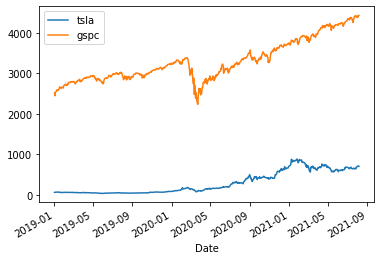

In [ ]:
%matplotlib inline
data.plot() #The stocks individial status at time

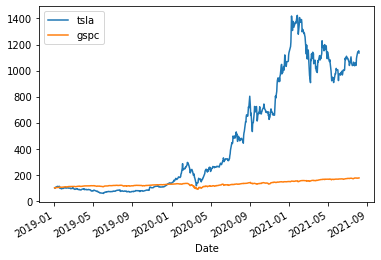

In [ ]:
data.rebase().plot() #testing two stocks upside at same time

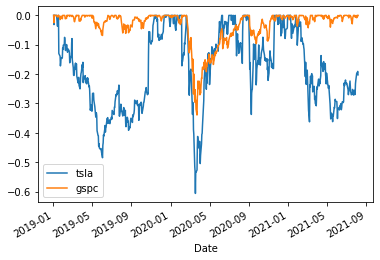

In [ ]:
data.to_drawdown_series().plot() #two stocks downway

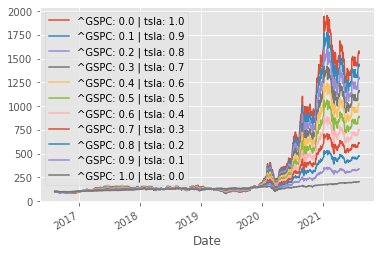

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


strategies = {}

for i in np.arange(0, 1.1, 0.1):
    title = "^GSPC: %.1f | tsla: %.1f" % (i, 1-i) #backtesting status of configuration proportion,like a 1 in 10 (proportion of image higher,reward higher)
    strategies[title] = (prices.rebase() * [i, 1-i]).mean(axis=1).rebase()

strategies = pd.DataFrame(strategies)


strategies.plot()

In [ ]:
stats = strategies.calc_stats() #configuration Combination (comparative on the words)
stats = pd.DataFrame(
    {
        name:pd.Series({key:getattr(pf, key) for key in dir(pf) if isinstance(getattr(pf, key), float)}, name=name) 
        for name,pf in stats.items()
    }).transpose()

stats.head()

/usr/local/lib/python3.7/dist-packages/ffn/core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
/usr/local/lib/python3.7/dist-packages/ffn/core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
/usr/local/lib/python3.7/dist-packages/ffn/core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
/usr/local/lib/python3.7/dist-packages/ffn/core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


,avg_down_month,avg_drawdown,avg_drawdown_days,avg_up_month,best_day,best_month,best_year,cagr,calmar,daily_kurt,daily_mean,daily_sharpe,daily_skew,daily_sortino,daily_vol,five_year,incep,max_drawdown,monthly_kurt,monthly_mean,monthly_sharpe,monthly_skew,monthly_sortino,monthly_vol,mtd,one_year,pos_month_perc,rf,six_month,ten_year,three_month,three_year,total_return,twelve_month_win_perc,win_year_perc,worst_day,worst_month,worst_year,yearly_kurt,yearly_mean,yearly_sharpe,yearly_skew,yearly_sortino,yearly_vol,ytd
^GSPC: 0.0 | tsla: 1.0,-0.092858,-0.097075,44.552632,0.174606,0.198949,0.741452,7.434370,0.732191,1.207708,5.523814,0.724398,1.223602,0.313604,2.153290,0.592021,0.732191,0.732191,-0.606265,2.218378,0.757957,1.146493,1.269238,3.513642,0.661109,0.022992,1.359726,0.583333,0.0,-0.175105,NaN,0.059469,1.173837,14.542095,0.66,0.8,-0.210628,-0.224266,-0.003784,4.938757,1.642700,0.506603,2.219187,970.814650,3.242577,-0.003784
^GSPC: 0.1 | tsla: 0.9,-0.086091,-0.090484,43.179487,0.164163,0.193605,0.724220,6.840152,0.700939,1.181152,5.732478,0.688265,1.227795,0.282086,2.151181,0.560570,0.700939,0.700939,-0.593437,2.610986,0.718689,1.147909,1.351719,3.557560,0.626085,0.022794,1.333588,0.583333,0.0,-0.171813,NaN,0.059418,1.118580,13.191314,0.68,0.8,-0.207240,-0.211172,-0.001542,4.934309,1.516786,0.508865,2.217919,2198.800386,2.980725,-0.001542
^GSPC: 0.2 | tsla: 0.8,-0.082519,-0.088914,41.024390,0.149248,0.190216,0.703884,6.221289,0.667209,1.152742,6.035055,0.651179,1.231059,0.247808,2.145227,0.528958,0.667209,0.667209,-0.578802,3.058773,0.678498,1.148632,1.440650,3.593592,0.590700,0.022555,1.302716,0.600000,0.0,-0.167793,NaN,0.059356,1.058604,11.840533,0.68,1.0,-0.203177,-0.206255,0.001184,4.927640,1.386107,0.511888,2.216028,inf,2.707833,0.001184
^GSPC: 0.3 | tsla: 0.7,-0.075320,-0.083630,40.975610,0.138659,0.186042,0.679525,5.576215,0.630511,1.122007,6.437806,0.612607,1.232873,0.208758,2.133735,0.496894,0.630511,0.630511,-0.561949,3.560305,0.636808,1.148421,1.534458,3.617499,0.554507,0.022260,1.265694,0.600000,0.0,-0.162773,NaN,0.059280,0.993051,10.489751,0.68,1.0,-0.198216,-0.200701,0.004571,4.917519,1.250383,0.516003,2.213166,inf,2.423206,0.004571
^GSPC: 0.4 | tsla: 0.6,-0.065229,-0.079438,39.857143,0.131288,0.180775,0.649817,4.903230,0.590182,1.088226,6.946066,0.571858,1.232478,0.161899,2.114625,0.463990,0.590182,0.590182,-0.542334,4.105388,0.592873,1.147002,1.629818,3.618899,0.516889,0.021887,1.220482,0.583333,0.0,-0.156328,NaN,0.059183,0.920785,9.138970,0.68,1.0,-0.192022,-0.194381,0.008895,4.901666,1.109324,0.521767,2.208689,inf,2.126091,0.008895


In [ ]:
stats.columns #strategies index check

Index(['avg_down_month', 'avg_drawdown', 'avg_drawdown_days', 'avg_up_month',
       'best_day', 'best_month', 'best_year', 'cagr', 'calmar', 'daily_kurt',
       'daily_mean', 'daily_sharpe', 'daily_skew', 'daily_sortino',
       'daily_vol', 'five_year', 'incep', 'max_drawdown', 'monthly_kurt',
       'monthly_mean', 'monthly_sharpe', 'monthly_skew', 'monthly_sortino',
       'monthly_vol', 'mtd', 'one_year', 'pos_month_perc', 'rf', 'six_month',
       'ten_year', 'three_month', 'three_year', 'total_return',
       'twelve_month_win_perc', 'win_year_perc', 'worst_day', 'worst_month',
       'worst_year', 'yearly_kurt', 'yearly_mean', 'yearly_sharpe',
       'yearly_skew', 'yearly_sortino', 'yearly_vol', 'ytd'],
      dtype='object')

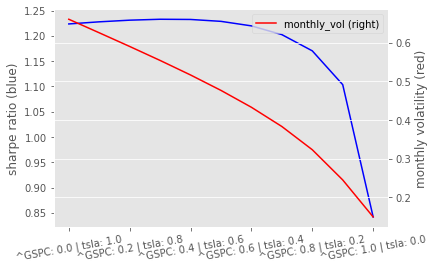

In [ ]:
stats['daily_sharpe'].plot(rot=10, color='blue', label='sharpe') #blue for sharpe ratio (reward/risk)
plt.ylabel("sharpe ratio (blue)")                #red for reward monthly
stats['monthly_vol'].plot(rot=10, color='red', secondary_y=True)
plt.ylabel("monthly volatility (red)")
plt.legend()

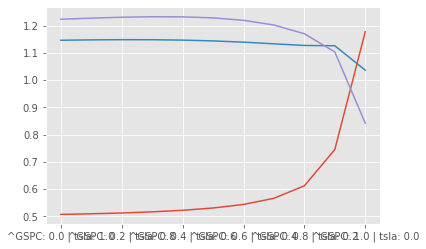

In [ ]:
stats['yearly_sharpe'].plot() #Year
stats['monthly_sharpe'].plot() #month
stats['daily_sharpe'].plot() #daily

In [ ]:
stats['monthly_mean'] #Year,month,daily

^GSPC: 0.0 | tsla: 1.0    0.757957
^GSPC: 0.1 | tsla: 0.9    0.718689
^GSPC: 0.2 | tsla: 0.8    0.678498
^GSPC: 0.3 | tsla: 0.7    0.636808
^GSPC: 0.4 | tsla: 0.6    0.592873
^GSPC: 0.5 | tsla: 0.5    0.545667
^GSPC: 0.6 | tsla: 0.4    0.493696
^GSPC: 0.7 | tsla: 0.3    0.434630
^GSPC: 0.8 | tsla: 0.2    0.364544
^GSPC: 0.9 | tsla: 0.1    0.276140
^GSPC: 1.0 | tsla: 0.0    0.154862
Name: monthly_mean, dtype: float64